In [63]:
from utils.model_evaluation import plot_test_pred
import pandas as pd
import scipy as sci

#loading the raw test data
X_test = pd.read_csv('./model_data_new_less/X_test.csv', index_col=0)
y_test = pd.read_csv('./model_data_new_less/y_test.csv', index_col=0)

X_train = pd.read_csv('./model_data_new_less/X_train.csv', index_col=0)
y_train = pd.read_csv('./model_data_new_less/y_train.csv', index_col=0)

X_val = pd.read_csv('./model_data_new_less/X_val.csv', index_col=0)
y_val = pd.read_csv('./model_data_new_less/y_val.csv', index_col=0)
# X_test.drop(columns=['mfc10_residual', 'total flow rate', 'mfc6_residual', 'mfc7_residual', 'mfc8_residual',
#        'mfc9_residual', 'mfc1_residual', 'mfc2_residual', 'mfc3_residual',
#        'mfc4_residual', 'mfc5_residual', 'tot_residual_flow'], inplace=True)

data_test = pd.concat((X_test,y_test), axis=1)
data_train = pd.concat((X_train,y_train), axis=1)
data_val = pd.concat((X_val,y_val), axis=1)

In [64]:
from sklearn.preprocessing import StandardScaler
scaler_coords = StandardScaler()
y_train = scaler_coords.fit_transform(y_train)
y_test = scaler_coords.transform(y_test)
y_val = scaler_coords.transform(y_val)

scaler_flows = StandardScaler()
X_train = scaler_flows.fit_transform(X_train)
X_test = scaler_flows.transform(X_test)
X_val = scaler_flows.transform(X_val)

In [65]:
# # filtering out the values at the two ends of the wing
# def std_normalization(data):
#     data = (data[(data.x1 > 2603) & (data.x1 <= 13976)])
#     y = data[['x1', 'y1']] 
#     x = data.drop(['x1', 'y1'], axis=1)
#     # finding sum of the mass flow rates of the row
#     sum_flows = x.sum(axis=1)
#     # normalizing each column with its row sum
#     norm_x = x.divide(sum_flows, axis=0)
#     norm_x.columns = ['mfc6', 'mfc7', 'mfc8', 'mfc9', 'mfc10', 'mfc1', 'mfc2', 'mfc3', 'mfc4', 'mfc5']
#     # norm_x.sum(axis=1)
#     return y, norm_x

# y, norm_x = std_normalization(data)

In [66]:
# def softmax_normalization(data):
#     data = (data[(data.x1 > 2603) & (data.x1 <= 13976)])
#     y = data[['x1', 'y1']] 
#     x = data.drop(['x1', 'y1'], axis=1)
#     # x = tf.convert_to_tensor(x)
#     # norm_x = tf.keras.activations.softmax(x, axis=1).numpy()
#     norm_x = sci.special.softmax(x, axis=1)
#     norm_x = pd.DataFrame(norm_x, 
#                           columns=['mfc6', 'mfc7', 'mfc8', 'mfc9', 'mfc10', 'mfc1', 'mfc2', 'mfc3', 'mfc4', 'mfc5'],
#                           index=data.index)
#     return y, norm_x

# y, norm_x = softmax_normalization(data)

# # This is very stupid

In [67]:
data = data_test

In [68]:
data = (data[(data.x1 > 2603) & (data.x1 <= 13976)])
# data = data.dropna()
y = data[['x1', 'y1']] 
x = data.drop(['x1', 'y1'], axis=1)
p = 2
powered_df = x.pow(p)
norm_x = powered_df.div(powered_df.sum(axis=1), axis=0)
norm_x = norm_x.set_index(data.index)
norm_x.columns = ['mfc6', 'mfc7', 'mfc8', 'mfc9', 'mfc10', 'mfc1', 'mfc2', 'mfc3', 'mfc4', 'mfc5']

In [69]:
full_data = (data[(data.x1 > 2603) & (data.x1 <= 13976)]).drop(['x1', 'y1'], axis=1)
full_data['sum'] =  full_data.sum(axis=1)
full_data.head()

,MFC6,MFC7,MFC8,MFC9,MFC10,MFC1,MFC2,MFC3,MFC4,MFC5,sum
sample_number,,,,,,,,,,,
414.0,0.0128,0.0238,0.0534,0.1142,0.0479,0.0105,0.0168,0.0266,0.0343,0.0233,0.3636
366.0,0.0476,0.0950,0.0424,0.0166,0.0269,0.0339,0.0402,0.0292,0.0250,0.0000,0.3568
NaN,0.0000,0.0145,0.0274,0.1926,0.0497,0.0000,0.0123,0.0208,0.0338,0.0350,0.3861
768.0,0.0954,0.0854,0.0254,0.0000,0.0177,0.0359,0.0309,0.0166,0.0087,0.0000,0.3160
588.0,0.0330,0.0590,0.0484,0.0228,0.0251,0.0341,0.0605,0.0499,0.0230,0.0115,0.3673


In [70]:
# norm_x.head()
norm_x['sum'] =  norm_x.sum(axis=1)
norm_x.head()

,mfc6,mfc7,mfc8,mfc9,mfc10,mfc1,mfc2,mfc3,mfc4,mfc5,sum
sample_number,,,,,,,,,,,
414.0,0.007537,0.026058,0.131183,0.599965,0.105552,0.005072,0.012984,0.032550,0.054123,0.024975,1.0
366.0,0.123605,0.492347,0.098074,0.015033,0.039476,0.062694,0.088161,0.046515,0.034096,0.000000,1.0
NaN,0.000000,0.004836,0.017268,0.853200,0.056813,0.000000,0.003480,0.009951,0.026277,0.028176,1.0
768.0,0.456252,0.365615,0.032343,0.000000,0.015706,0.064610,0.047866,0.013814,0.003794,0.000000,1.0
588.0,0.067907,0.217064,0.146075,0.032416,0.039285,0.072509,0.228242,0.155269,0.032987,0.008247,1.0


In [71]:
def leakage_prediction(normalized_flows):
    # coordinates of the sensor
    sensors = pd.DataFrame([[2426, 70], [5480, 70], [8661, 191], [11676, 584], [13976, 917], [2603, 5163], 
                            [5723, 5163], [8417, 5103], [11646, 4740], [14641, 4391]], 
                            columns=['x', 'y'], 
                            index=['mfc1', 'mfc2', 'mfc3', 'mfc4', 'mfc5', 'mfc6', 'mfc7', 'mfc8', 'mfc9', 'mfc10']
                            )
    # x coordinate of the sensor
    sensors_x = sensors['x']
    # y coordinate of the sensor
    sensors_y = sensors['y']
    leakage_x = 0
    leakage_y = 0
    for i in range(1,11):
        sensor = 'mfc'+str(i)
        # multiplying each sensor coordinate with its normalized value and adding this value of each sensor together using for loop
        leakage_x = leakage_x + sensors_x[sensor] * normalized_flows[sensor] 
        leakage_y = leakage_y + sensors_y[sensor] * normalized_flows[sensor]
    leakage = pd.concat((leakage_x, leakage_y),axis=1)
    return leakage
leakage = leakage_prediction(norm_x)

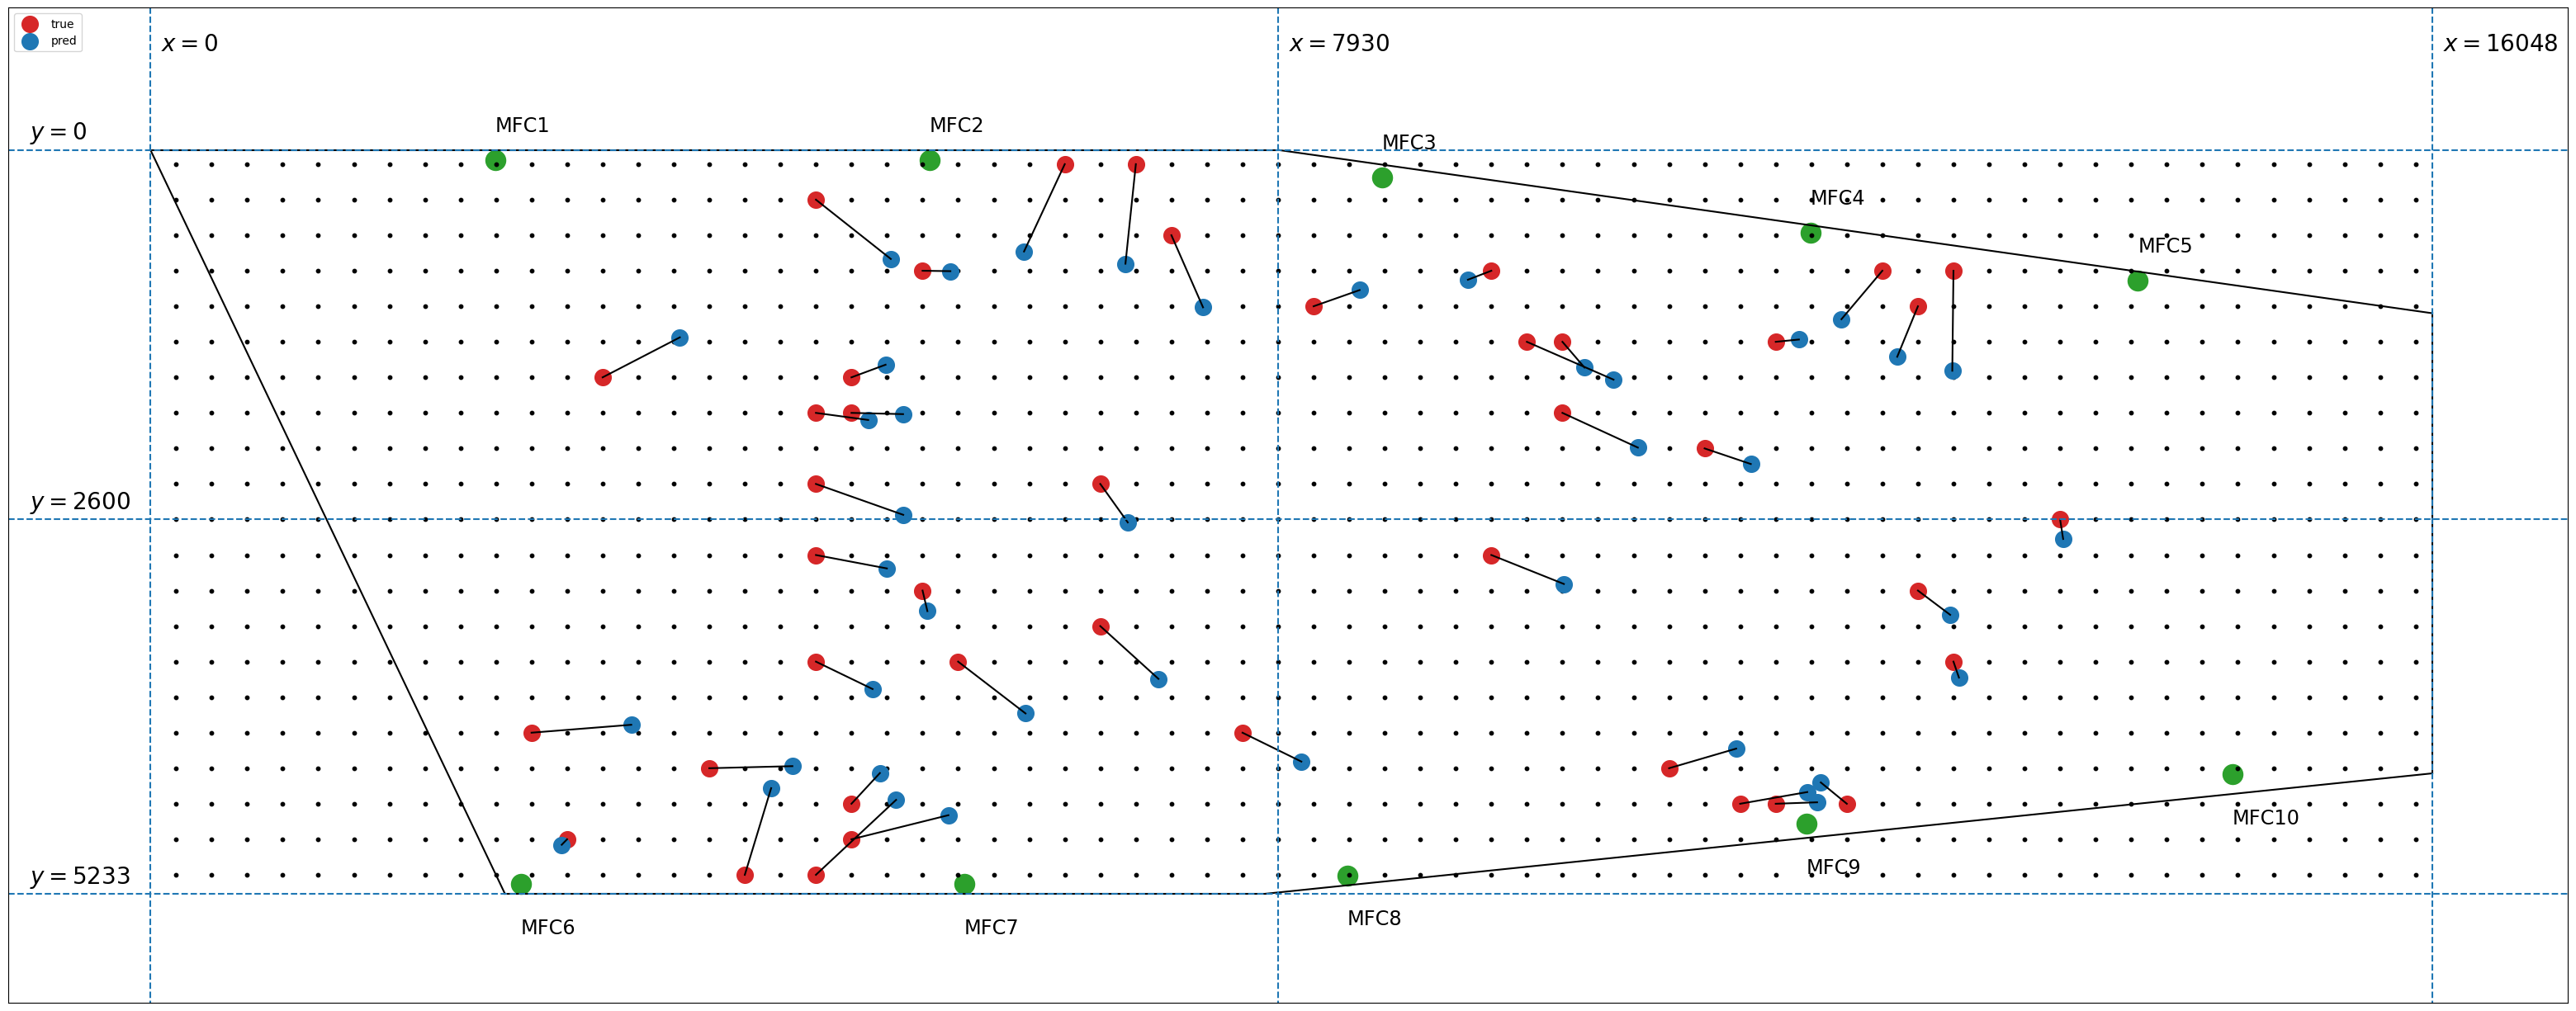

In [72]:
# plot of predicted and true value
plot_test_pred(y.to_numpy(), leakage.to_numpy())

In [73]:
# from sklearn.metrics import mean_squared_error
# mean_squared_error(y.to_numpy(), leakage.to_numpy(), squared=False)
import numpy as np
y = scaler_coords.fit_transform(y.to_numpy())
leakage = scaler_coords.fit_transform(leakage.to_numpy())
absolute_differences = np.abs(y - leakage)

# Calculate the mean absolute error (MAE)
mae = np.mean(absolute_differences)
mae

0.09269878512023555

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
reg = LinearRegression().fit(X_train, y_train)
y_predictions_train = reg.predict(X_train)
# print("train", "{:10.4f}".format(mean_squared_error(y_train, y_predictions, squared=True)))
y_predictions_val = reg.predict(X_val)
# print("val", "{:10.4f}".format(mean_squared_error(y_val, y_predictions, squared=True)))
y_predictions = reg.predict(X_test)
loss_test = "{:10.4f}".format(mean_squared_error(y_test, y_predictions, squared=True))
metric_test = "{:10.4f}".format(mean_absolute_error(y_test, y_predictions))

loss_val = "{:10.4f}".format(mean_squared_error(y_val, y_predictions_val, squared=True))
metric_val = "{:10.4f}".format(mean_absolute_error(y_val, y_predictions_val))

loss_train = "{:10.4f}".format(mean_squared_error(y_train, y_predictions_train, squared=True))
metric_train = "{:10.4f}".format(mean_absolute_error(y_train, y_predictions_train))

print(metric_test, metric_val, metric_train)

    0.1184     0.1218     0.1230
